# INTRO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import re
import os
from datetime import datetime, timedelta
import pytz

import warnings
warnings.filterwarnings("ignore")
import psychrolib
from pythermalcomfort.models import pmv_ppd
from pythermalcomfort.utilities import v_relative, clo_dynamic

## Formula

In [2]:
def pmv_ppd_generator(df,dbt,rh, mrt, met_val, clo_val, a_vel, yang_mana ):
  tdb = df[dbt].values
  tr = df[mrt].values
  vel = a_vel
  rh = df[rh].values
  met = met_val
  clo = clo_val

  v_rel = v_relative(vel, met)
  clo_d = clo_dynamic(clo, met)
  results = pmv_ppd( tdb=tdb, tr=tr ,vr=v_rel, rh= rh, met=met, clo=clo_d,standard= 'ashrae', units= 'SI')
  df[(yang_mana + str(a_vel)+'_pmv')] = results['pmv']
  df[(yang_mana + str(a_vel)+'_ppd')] = results['ppd']/100

## Directory

In [3]:
folder_raw     = 'malang'
folder_project = 'project'
platform_directory = 'C:/Users/azimilga'
directory_path = platform_directory +  '/' + folder_project + '/' + folder_raw + '/'

# Import File

In [4]:
folder_path1 = directory_path # replace with the folder path
df = pd.read_excel(folder_path1 + 'data.xlsx' )# read csv file into a dataframe

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].apply(lambda x: x.replace(year=2024))
df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

df['day']  = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month

# Define & Process

In [6]:
met_rate = 1.2
clo_value = 0.61
air_velocity = 1.5
pmv_ppd_generator(df,'1_dbt','1_rh', '1_mrt', met_rate, clo_value, air_velocity, 'hall_' )
pmv_ppd_generator(df,'2_dbt','2_rh', '2_mrt', met_rate, clo_value, air_velocity, 'lobby_' )

In [7]:
df2 = df[(df['day']>0) &(df['day']<6) & (df['hour']>7) & (df['hour']<19)]     #.info()

In [8]:
pivot_df = df2.pivot_table(index=['month', 'day', 'hour'])
pivot_df_med = df2.pivot_table(index=['month', 'day', 'hour'], aggfunc='median')

C:\Users\azimilga\AppData\Local\Temp\ipykernel_9752\3966812996.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_df = df2.pivot_table(index=['month', 'day', 'hour'])
C:\Users\azimilga\AppData\Local\Temp\ipykernel_9752\3966812996.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_df_med = df2.pivot_table(index=['month', 'day', 'hour'], aggfunc='median')


In [14]:
df2 .columns

Index(['datetime', 'date', 'time', '1_temp', '2_temp', '1_cms', '2_cms',
       '1_rh', '2_rh', '1_ach', '2_ach', '1_mrt', '2_mrt', '2_dbt', '1_dbt',
       '1_ppm', '2_ppm', 'day', 'hour', 'month', 'hall_1.5_pmv',
       'hall_1.5_ppd', 'lobby_1.5_pmv', 'lobby_1.5_ppd'],
      dtype='object')

c:\Users\azimilga\AppData\Local\miniconda3\envs\DIGGMINSKOLE\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
c:\Users\azimilga\AppData\Local\miniconda3\envs\DIGGMINSKOLE\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
c:\Users\azimilga\AppData\Local\miniconda3\envs\DIGGMINSKOLE\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` 

([<matplotlib.axis.YTick at 0x20efa616940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

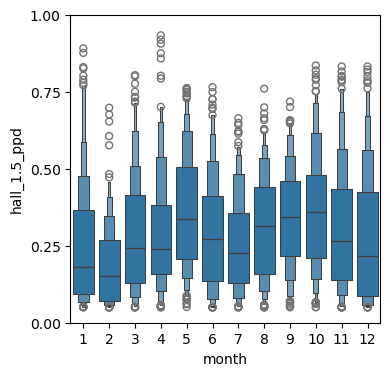

In [12]:
plt.subplots(figsize=(4,4))
sns.boxenplot(data= df2, x='month', y= 'hall_1.5_ppd'  )
plt.yticks( ticks=[0,0.25,0.5,0.75,1]  , horizontalalignment='right',rotation=0)
# plt.yticks( ticks= [3,2,1,0,-1],   horizontalalignment='right',rotation=0)
# plt.xticks( rotation=30)

c:\Users\azimilga\AppData\Local\miniconda3\envs\DIGGMINSKOLE\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
c:\Users\azimilga\AppData\Local\miniconda3\envs\DIGGMINSKOLE\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


<AxesSubplot:xlabel='1_temp', ylabel='1_mrt'>

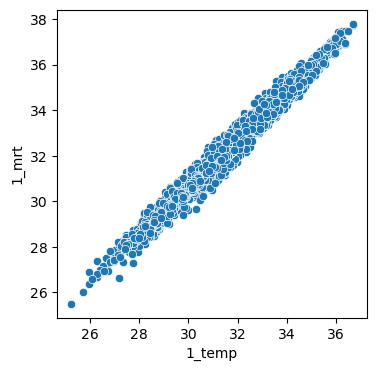

In [15]:
plt.subplots(figsize=(4,4))
sns.scatterplot(data= df2, x='1_temp', y= '1_mrt'  )
# plt.yticks( ticks=[0,0.25,0.5,0.75,1]  , horizontalalignment='right',rotation=0)
# plt.yticks( ticks= [3,2,1,0,-1],   horizontalalignment='right',rotation=0)
# plt.xticks( rotation=30)

# Export

In [196]:
with pd.ExcelWriter(directory_path + 'output.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index to store the dataframe in specified sheet
    df.to_excel(writer, sheet_name = 'all data', index=True) 
    df.describe().to_excel(writer, sheet_name = 'all-desc', index=True) 
    df2.to_excel(writer, sheet_name = 'filtered', index=True) 
    df2.describe().to_excel(writer, sheet_name = 'filtered-desc', index=True) 
    pivot_df.to_excel(writer, sheet_name = 'pivoted', index=True) 
    pivot_df_med.to_excel(writer, sheet_name = 'pivoted_med', index=True) 